<a href="https://colab.research.google.com/github/GuillermoFidalgo/UA-EM-1/blob/main/Finite_elements.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Set 5 Solutions

PH - 531 E&M

Author:  Guillermo Fidlago


Use the finite element method described in Section 2.12 of Jackson’s textbook to find the potential inside a square of side $a$.
The potential at the top of the square is one volt $(V(x,y=a)=1$ Volt).
The potential on the other three sides is zero. There is no charge inside the square.
Compare your result with the exact result which you can obtain using separation of variables

For the analytical method we have to solve the Laplace Equation with Separation of Variables



$$ \nabla^2 V = 0 $$

\begin{equation*}
\frac{\partial^2 V}{ \partial x^2}  + \frac{\partial^2 V}{\partial y^2} = 0
\end{equation*}

If we assume a Solution of the form
$$
    X(x)Y(y) = V(x,y)
$$

we end with the following expression
$$
\underbrace{\frac{X''}{X}}_{\alpha^2} + \underbrace{\frac{Y''}{Y}}_{\beta^2}= 0
$$
This can only be true for two constant terms that add to zero and in this case $\alpha^2 = -\beta^2$.
Due to the symmetry of this problem we choose the following two second order ODE's.

\begin{gather*}
\frac{d^2 V}{d x^2} = -\alpha^2 X \to A\cos \alpha x + B \sin \alpha x \\
\frac{d^2 V}{d y^2} = \alpha^2 Y \to C e^{\alpha y} + D e^{-\alpha y}
\end{gather*}

Now we can solve the following equation with the boundary conditions.

\begin{gather*}
V(x,y) =  (A\cos \alpha x + B \sin \alpha x) (C e^{\alpha y} + D e^{-\alpha y})\\
V(0,y) = (A) (C e^{\alpha y} + D e^{-\alpha y}) = 0 \quad\to \quad A = 0\\
V(a,y) = B \sin \alpha x (C e^{\alpha y} + D e^{-\alpha y}) = 0 \quad\to \quad \alpha = \frac{n\pi}{a}\\
V(x,0) = B \sin\left(\frac{n\pi}{a}x \right) (C  + D ) = 0 \quad \to \quad C = -D
\end{gather*}

We now have
$$ V(x,y) = B\sin\left(\frac{n\pi}{a}x \right)\sinh\left(\frac{n\pi}{a}y \right) $$
Where I have absorbed the constant C into B. The General solution has to be a lienar combination of all n solutions.

$$ V(x,y) = \sum^\infty_{n=1} B_n \sin\left(\frac{n\pi}{a}x \right) \sinh\left(\frac{n\pi}{a}y \right)$$



To find the coefficients we identify this as a Fourier sine series and apply the last boundary condition here.

\begin{gather*}
V(x,y=a) = \sum^\infty_{n=1} B_n \sin\left(\frac{n\pi}{a}x \right) \sinh(n\pi) = 1\\
B_n \sinh(n\pi) = \frac2a \int_0^a (1) \sin \left(\frac{n\pi}{a}x \right) dx =
\begin{cases}
0 & \text{if $n$ is even}\\
\frac{4}{n\pi} & \text{if $n$ is odd}
\end{cases}
\end{gather*}

With this we now have our final expression for the potential.

$$ V(x,y) = \sum^\infty_{n\; \text{is odd}} \frac{4}{n\pi} \frac{\sin \left(\frac{n\pi}{a}x \right) \sinh \left( \frac{n\pi}{a}y \right) }{\sinh (n\pi) } $$

We can verrify this quickly by plotting our solution below.

In [ ]:
import matplotlib.pyplot as plt
import numba as nb
import numpy as np

In [ ]:
# This decorator allows the function to work with arrays, not just single scalars.
@nb.vectorize
def V(x, y, Nsquares=100):
    init = 0
    for i in range(1, Nsquares, 2):
        init += (
            4
            / (i * np.pi)
            / np.sinh(i * np.pi)
            * np.sin(i * np.pi * x / a)
            * np.sinh(i * np.pi * y / a)
        )
    return init

In [ ]:
a = 1
N = 100
h = a / N
x = np.arange(0, a, h)
y = np.arange(0, a, h)
X, Y = np.meshgrid(x, y)

In [ ]:
%%timeit
V(X, Y, N)

12.3 ms ± 854 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


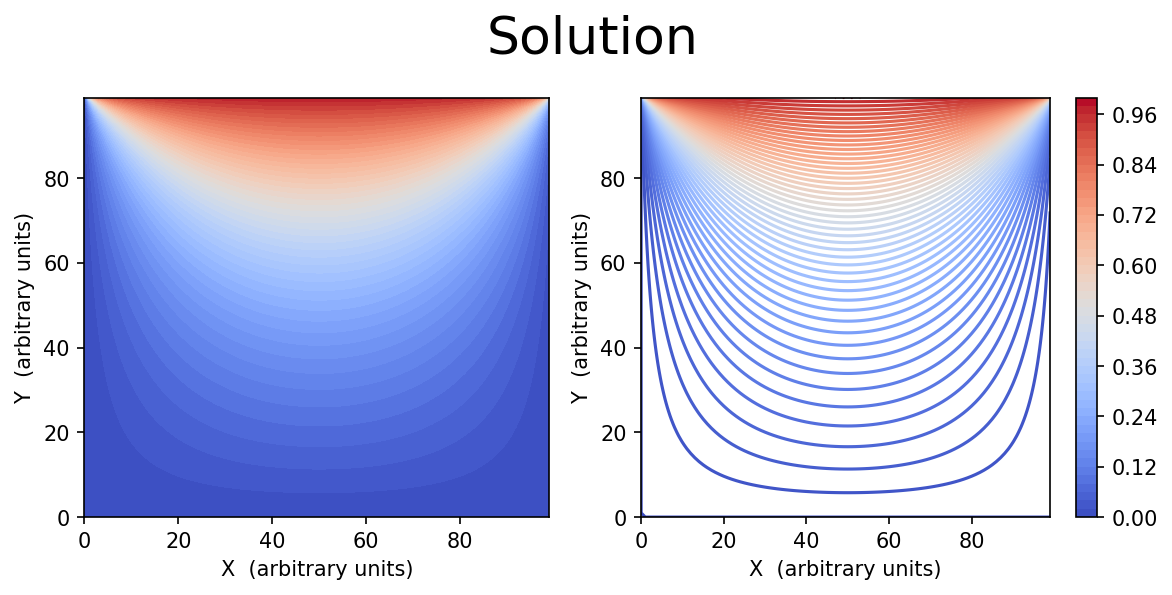

In [ ]:
fig, ax = plt.subplots(1, 2, dpi=150, figsize=[8, 4], width_ratios=[1, 1.1])
# img = ax[0].imshow(V(X, Y, N), cmap="coolwarm", origin="lower")
img = ax[0].contourf(V(X, Y, N), 50, cmap="coolwarm")
ax[0].set_xlabel("X  (arbitrary units)")
ax[0].set_ylabel("Y  (arbitrary units)")

ax[1].contour(V(X, Y, N), 50, cmap="coolwarm")
ax[1].set_xlabel("X  (arbitrary units)")
ax[1].set_ylabel("Y  (arbitrary units)")
fig.colorbar(mappable=img, ax=ax[1])
fig.suptitle("Solution", size=25)
fig.tight_layout()

plt.show()

## Now for the Finite Elements method